# Notes {-}

In [1]:
import numpy as np 
import pandas as pd 
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot
from yellowbrick.regressor import prediction_error

## Introduction to Modeling Libraries in Python

* Use different libraries depending on the application

## Interfacing Between pandas and Model Code

* Pandas for data loading and cleaning
* Modeling library for building model

In [2]:
df = pd.read_excel("data/Life Expectancy at Birth.xlsx", engine="openpyxl")
df.dropna(inplace=True)
df.columns = df.columns.map(lambda row: "_".join(row.lower().split(" ")))
sample = df.groupby("region").sample(n=20).sort_values(by="year")
sample

,country,country_code,region,income_group,year,life_expectancy
187,Poland,POL,Europe & Central Asia,High income,1960,67.680488
248,United States,USA,North America,High income,1960,69.770732
444,Pakistan,PAK,South Asia,Lower middle income,1961,46.223220
274,Australia,AUS,East Asia & Pacific,High income,1961,70.973171
367,Indonesia,IDN,East Asia & Pacific,Lower middle income,1961,49.269805
...,...,...,...,...,...,...
14254,Czech Republic,CZE,Europe & Central Asia,High income,2014,78.824390
14368,Malaysia,MYS,East Asia & Pacific,Upper middle income,2014,74.718293
14235,Canada,CAN,North America,High income,2014,81.956610
14381,Oman,OMN,Middle East & North Africa,High income,2014,77.085098


In [52]:
numeric_cols = ["year", "life_expectancy"]
df_num = sample[numeric_cols]
df_num

,year,life_expectancy
187,1960,67.680488
248,1960,69.770732
444,1961,46.223220
274,1961,70.973171
367,1961,49.269805
...,...,...
14254,2014,78.824390
14368,2014,74.718293
14235,2014,81.956610
14381,2014,77.085098


Turn a DataFrame into a NumPy array, use the `to_numpy` method:

In [53]:
df_num = df_num.to_numpy()

In [54]:
isinstance(df_num, np.ndarray) # an ndarray of Python objects

True

To convert back to a DataFrame, as you may recall from earlier chapters, you can pass a two-dimensional ndarray with optional column names:

In [57]:
df2 = pd.DataFrame(sample.to_numpy(), columns=['country', 'country_code', 'region', 'income_group', 'year', 'life_expectancy'])
df2

,country,country_code,region,income_group,year,life_expectancy
0,Poland,POL,Europe & Central Asia,High income,1960,67.680488
1,United States,USA,North America,High income,1960,69.770732
2,Pakistan,PAK,South Asia,Lower middle income,1961,46.22322
3,Australia,AUS,East Asia & Pacific,High income,1961,70.973171
4,Indonesia,IDN,East Asia & Pacific,Lower middle income,1961,49.269805
...,...,...,...,...,...,...
135,Czech Republic,CZE,Europe & Central Asia,High income,2014,78.82439
136,Malaysia,MYS,East Asia & Pacific,Upper middle income,2014,74.718293
137,Canada,CAN,North America,High income,2014,81.95661
138,Oman,OMN,Middle East & North Africa,High income,2014,77.085098


In [9]:
df_mix = sample.to_numpy()
df_mix

array([['Poland', 'POL', 'Europe & Central Asia', 'High income', 1960,
        67.680487805],
       ['United States', 'USA', 'North America', 'High income', 1960,
        69.770731707],
       ['Pakistan', 'PAK', 'South Asia', 'Lower middle income', 1961,
        46.223219512],
       ['Australia', 'AUS', 'East Asia & Pacific', 'High income', 1961,
        70.973170732],
       ['Indonesia', 'IDN', 'East Asia & Pacific', 'Lower middle income',
        1961, 49.269804878],
       ['Kazakhstan', 'KAZ', 'Europe & Central Asia',
        'Upper middle income', 1962, 59.199073171],
       ['Bangladesh', 'BGD', 'South Asia', 'Lower middle income', 1962,
        47.08397561],
       ['Cuba', 'CUB', 'Latin America & Caribbean',
        'Upper middle income', 1962, 65.138219512],
       ['Finland', 'FIN', 'Europe & Central Asia', 'High income', 1962,
        68.577804878],
       ['Hungary', 'HUN', 'Europe & Central Asia', 'High income', 1962,
        67.865853659],
       ['Azerbaijan', 'AZE',

In [10]:
isinstance(df_mix, np.ndarray) # an ndarray of Python objects

True

Use a subset by using `loc` indexing with `to_numpy`:

In [13]:
sample.loc[:, numeric_cols].to_numpy()

array([[1960.        ,   67.6804878 ],
       [1960.        ,   69.77073171],
       [1961.        ,   46.22321951],
       [1961.        ,   70.97317073],
       [1961.        ,   49.26980488],
       [1962.        ,   59.19907317],
       [1962.        ,   47.08397561],
       [1962.        ,   65.13821951],
       [1962.        ,   68.57780488],
       [1962.        ,   67.86585366],
       [1963.        ,   62.052     ],
       [1963.        ,   36.42517073],
       [1963.        ,   62.4595122 ],
       [1963.        ,   58.78158537],
       [1963.        ,   44.10078049],
       [1963.        ,   62.99258537],
       [1964.        ,   39.80690244],
       [1964.        ,   47.81126829],
       [1964.        ,   52.6747561 ],
       [1965.        ,   40.49602439],
       [1965.        ,   64.715     ],
       [1967.        ,   72.20780488],
       [1967.        ,   45.31687805],
       [1968.        ,   51.56868293],
       [1969.        ,   50.15834146],
       [1970.        ,   

There is a nonnumeric column in our example dataset. Let's convert `income_group` to dummy variables. But this can be error prone.

In [14]:
dummies = pd.get_dummies(sample.income_group, prefix='income_group')
data_with_dummies = sample.drop('income_group', axis=1).join(dummies)
data_with_dummies

,country,country_code,region,year,life_expectancy,income_group_High income,income_group_Low income,income_group_Lower middle income,income_group_Upper middle income
187,Poland,POL,Europe & Central Asia,1960,67.680488,1,0,0,0
248,United States,USA,North America,1960,69.770732,1,0,0,0
444,Pakistan,PAK,South Asia,1961,46.223220,0,0,1,0
274,Australia,AUS,East Asia & Pacific,1961,70.973171,1,0,0,0
367,Indonesia,IDN,East Asia & Pacific,1961,49.269805,0,0,1,0
...,...,...,...,...,...,...,...,...,...
14254,Czech Republic,CZE,Europe & Central Asia,2014,78.824390,1,0,0,0
14368,Malaysia,MYS,East Asia & Pacific,2014,74.718293,0,0,0,1
14235,Canada,CAN,North America,2014,81.956610,1,0,0,0
14381,Oman,OMN,Middle East & North Africa,2014,77.085098,1,0,0,0


## Creating Model Descriptions with Patsy

Patsy is a Python package that allows data transformations using arbitrary Python code.

Patsy describes statistical models with a string-based "formula syntax":

```
y ~ x0 + x1
```

where `x0`, `x1` are terms in the design matrix created for the model. 

In [15]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + year', data=sample
)

`outcome` is a `DesignMatrix` object that represents `life_expectancy` which is the variable we want to predict.

In [16]:
outcome

DesignMatrix with shape (140, 1)
  life_expectancy
         67.68049
         69.77073
         46.22322
         70.97317
         49.26980
         59.19907
         47.08398
         65.13822
         68.57780
         67.86585
         62.05200
         36.42517
         62.45951
         58.78159
         44.10078
         62.99259
         39.80690
         47.81127
         52.67476
         40.49602
         64.71500
         72.20780
         45.31688
         51.56868
         50.15834
         54.96951
         54.44346
         40.50444
         70.29000
         61.81917
  [110 rows omitted]
  Terms:
    'life_expectancy' (column 0)
  (to view full data, use np.asarray(this_obj))

`predictors` is a `DesignMatrix` object that represents the combination of `income_group`, `region`, `year`. 

We have 140 examples, 11 features:

* Intercept (column 0): an array of 1s
* `income group`: columns 1 - 4
* `region`: columns 4-10
* `year`: columns 10

The extra columns for `income_group` and `regions` are from One-Hot encoding, a process by which categorical variables are converted into a form that could be provided to ML algorithms.

In [17]:
predictors

DesignMatrix with shape (140, 11)
  Columns:
    ['Intercept',
     'income_group[T.Low income]',
     'income_group[T.Lower middle income]',
     'income_group[T.Upper middle income]',
     'region[T.Europe & Central Asia]',
     'region[T.Latin America & Caribbean]',
     'region[T.Middle East & North Africa]',
     'region[T.North America]',
     'region[T.South Asia]',
     'region[T.Sub-Saharan Africa]',
     'year']
  Terms:
    'Intercept' (column 0)
    'income_group' (columns 1:4)
    'region' (columns 4:10)
    'year' (column 10)
  (to view full data, use np.asarray(this_obj))

These Patsy DesignMatrix instances are NumPy ndarrays with additional metadata:

In [18]:
np.asarray(predictors)

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.960e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        1.960e+03],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        1.961e+03],
       ...,
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.014e+03],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 0.000e+00, 0.000e+00,
        2.014e+03],
       [1.000e+00, 1.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        2.015e+03]])

In [19]:
np.asarray(outcome)

array([[67.6804878 ],
       [69.77073171],
       [46.22321951],
       [70.97317073],
       [49.26980488],
       [59.19907317],
       [47.08397561],
       [65.13821951],
       [68.57780488],
       [67.86585366],
       [62.052     ],
       [36.42517073],
       [62.4595122 ],
       [58.78158537],
       [44.10078049],
       [62.99258537],
       [39.80690244],
       [47.81126829],
       [52.6747561 ],
       [40.49602439],
       [64.715     ],
       [72.20780488],
       [45.31687805],
       [51.56868293],
       [50.15834146],
       [54.9695122 ],
       [54.44346341],
       [40.50443902],
       [70.29      ],
       [61.81917073],
       [65.26039024],
       [63.44317073],
       [52.57014634],
       [41.08814634],
       [72.93390244],
       [49.15112195],
       [39.2874878 ],
       [55.758     ],
       [71.95609756],
       [69.4997561 ],
       [65.27317073],
       [69.14282927],
       [49.2705122 ],
       [72.85609756],
       [39.57570732],
       [42

Suppress the intercept by adding the term + 0 to the model:

In [21]:
y, X = patsy.dmatrices(
    'life_expectancy ~ income_group + region + year + 0', data=sample
)
X

DesignMatrix with shape (140, 11)
  Columns:
    ['income_group[High income]',
     'income_group[Low income]',
     'income_group[Lower middle income]',
     'income_group[Upper middle income]',
     'region[T.Europe & Central Asia]',
     'region[T.Latin America & Caribbean]',
     'region[T.Middle East & North Africa]',
     'region[T.North America]',
     'region[T.South Asia]',
     'region[T.Sub-Saharan Africa]',
     'year']
  Terms:
    'income_group' (columns 0:4)
    'region' (columns 4:10)
    'year' (column 10)
  (to view full data, use np.asarray(this_obj))

The Patsy objects can be passed directly into algorithms like `numpy.linalg.lstsq`, which performs an ordinary least squares regression. The model metadata is retained in the design_info attribute:

In [22]:
coef, resid, _, _ = np.linalg.lstsq(outcome, predictors)
coef

/tmp/ipykernel_133/2774571045.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid, _, _ = np.linalg.lstsq(outcome, predictors)


array([[1.51964589e-02, 9.81119953e-04, 4.41412174e-03, 2.65860943e-03,
        2.40182610e-03, 2.29746257e-03, 2.26362465e-03, 2.58305159e-03,
        1.77260076e-03, 1.76133204e-03, 3.02004208e+01]])

You can reattach the model column names to the fitted coefficients to obtain a Series, for example:

In [23]:
coef = pd.Series(coef.squeeze(), index=outcome.design_info.column_names)

ValueError: Length of values (11) does not match length of index (1)

### Data Transformations in Patsy Formulas
You can mix Python code into your Patsy formulas:

In [24]:
outcome, predictors = patsy.dmatrices(
    'np.round(life_expectancy) ~ income_group + region + year', data=sample
)

outcome

DesignMatrix with shape (140, 1)
  np.round(life_expectancy)
                         68
                         70
                         46
                         71
                         49
                         59
                         47
                         65
                         69
                         68
                         62
                         36
                         62
                         59
                         44
                         63
                         40
                         48
                         53
                         40
                         65
                         72
                         45
                         52
                         50
                         55
                         54
                         41
                         70
                         62
  [110 rows omitted]
  Terms:
    'np.round(life_expectancy)' (column 0)
  (to view full data, use 

Some commonly used variable transformations include standardizing (to mean 0 and variance 1) and centering (subtracting the mean). Patsy has built-in functions for this purpose:

In [25]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + center(year)', data=sample
)

predictors

DesignMatrix with shape (140, 11)
  Columns:
    ['Intercept',
     'income_group[T.Low income]',
     'income_group[T.Lower middle income]',
     'income_group[T.Upper middle income]',
     'region[T.Europe & Central Asia]',
     'region[T.Latin America & Caribbean]',
     'region[T.Middle East & North Africa]',
     'region[T.North America]',
     'region[T.South Asia]',
     'region[T.Sub-Saharan Africa]',
     'center(year)']
  Terms:
    'Intercept' (column 0)
    'income_group' (columns 1:4)
    'region' (columns 4:10)
    'center(year)' (column 10)
  (to view full data, use np.asarray(this_obj))

The patsy.build_design_matrices function can apply transformations to new out-of-sample data using the saved information from the original in-sample dataset:

In [26]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + center(year)', data=sample
)

new_df = df.groupby("region").sample(n=20).sort_values(by="year")

new_predictors = patsy.build_design_matrices([predictors.design_info], new_df)

new_predictors

[DesignMatrix with shape (140, 11)
   Columns:
     ['Intercept',
      'income_group[T.Low income]',
      'income_group[T.Lower middle income]',
      'income_group[T.Upper middle income]',
      'region[T.Europe & Central Asia]',
      'region[T.Latin America & Caribbean]',
      'region[T.Middle East & North Africa]',
      'region[T.North America]',
      'region[T.South Asia]',
      'region[T.Sub-Saharan Africa]',
      'center(year)']
   Terms:
     'Intercept' (column 0)
     'income_group' (columns 1:4)
     'region' (columns 4:10)
     'center(year)' (column 10)
   (to view full data, use np.asarray(this_obj))]

When you want to add columns from a dataset by name, you must wrap them in the special I function:

In [27]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + I(year + year)', data=sample # nonsense
)

## Categorical Data and Patsy

When you use nonnumeric terms in a Patsy formula, they are converted to dummy variables by default.

In [28]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + year', data=sample
)

predictors

DesignMatrix with shape (140, 11)
  Columns:
    ['Intercept',
     'income_group[T.Low income]',
     'income_group[T.Lower middle income]',
     'income_group[T.Upper middle income]',
     'region[T.Europe & Central Asia]',
     'region[T.Latin America & Caribbean]',
     'region[T.Middle East & North Africa]',
     'region[T.North America]',
     'region[T.South Asia]',
     'region[T.Sub-Saharan Africa]',
     'year']
  Terms:
    'Intercept' (column 0)
    'income_group' (columns 1:4)
    'region' (columns 4:10)
    'year' (column 10)
  (to view full data, use np.asarray(this_obj))

If you omit the intercept from the model, then columns for each category value will be included in the model design matrix:

In [31]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ region + income_group + year + 0', data=sample # will have all levels but only for the FIRST categorical variable
)

predictors

DesignMatrix with shape (140, 11)
  Columns:
    ['region[East Asia & Pacific]',
     'region[Europe & Central Asia]',
     'region[Latin America & Caribbean]',
     'region[Middle East & North Africa]',
     'region[North America]',
     'region[South Asia]',
     'region[Sub-Saharan Africa]',
     'income_group[T.Low income]',
     'income_group[T.Lower middle income]',
     'income_group[T.Upper middle income]',
     'year']
  Terms:
    'region' (columns 0:7)
    'income_group' (columns 7:10)
    'year' (column 10)
  (to view full data, use np.asarray(this_obj))

Numeric columns can be interpreted as categorical with the C function:

In [32]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + C(year)', data=sample
)

predictors

DesignMatrix with shape (140, 60)
  Columns:
    ['Intercept',
     'income_group[T.Low income]',
     'income_group[T.Lower middle income]',
     'income_group[T.Upper middle income]',
     'region[T.Europe & Central Asia]',
     'region[T.Latin America & Caribbean]',
     'region[T.Middle East & North Africa]',
     'region[T.North America]',
     'region[T.South Asia]',
     'region[T.Sub-Saharan Africa]',
     'C(year)[T.1961]',
     'C(year)[T.1962]',
     'C(year)[T.1963]',
     'C(year)[T.1964]',
     'C(year)[T.1965]',
     'C(year)[T.1967]',
     'C(year)[T.1968]',
     'C(year)[T.1969]',
     'C(year)[T.1970]',
     'C(year)[T.1971]',
     'C(year)[T.1972]',
     'C(year)[T.1973]',
     'C(year)[T.1974]',
     'C(year)[T.1975]',
     'C(year)[T.1976]',
     'C(year)[T.1977]',
     'C(year)[T.1978]',
     'C(year)[T.1979]',
     'C(year)[T.1980]',
     'C(year)[T.1981]',
     'C(year)[T.1982]',
     'C(year)[T.1983]',
     'C(year)[T.1984]',
     'C(year)[T.1985]',
     'C(yea

Include interaction terms of the form `key1:key2`:

In [33]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + year + income_group:region', data=sample
)

predictors

DesignMatrix with shape (140, 29)
  Columns:
    ['Intercept',
     'income_group[T.Low income]',
     'income_group[T.Lower middle income]',
     'income_group[T.Upper middle income]',
     'region[T.Europe & Central Asia]',
     'region[T.Latin America & Caribbean]',
     'region[T.Middle East & North Africa]',
     'region[T.North America]',
     'region[T.South Asia]',
     'region[T.Sub-Saharan Africa]',
     'income_group[T.Low income]:region[T.Europe & Central Asia]',
     'income_group[T.Lower middle income]:region[T.Europe & Central Asia]',
     'income_group[T.Upper middle income]:region[T.Europe & Central Asia]',
     'income_group[T.Low income]:region[T.Latin America & Caribbean]',
     'income_group[T.Lower middle income]:region[T.Latin America & Caribbean]',
     'income_group[T.Upper middle income]:region[T.Latin America & Caribbean]',
     'income_group[T.Low income]:region[T.Middle East & North Africa]',
     'income_group[T.Lower middle income]:region[T.Middle East & 

## Introduction to statsmodels

statsmodels is a Python library for fitting many kinds of statistical models, performing statistical tests, and data exploration and visualization.

* Linear models, generalized linear models, and robust linear models
* Linear mixed effects models
* Analysis of variance (ANOVA) methods
* Time series processes and state space models
* Generalized method of moments

The sm.add_constant function can add an intercept column to an existing matrix:

In [ ]:
predictor_model = sm.add_constant(predictors)
predictor_model

The sm.OLS class can fit an ordinary least squares linear regression. The model's fit method returns a regression results object containing estimated model parameters and other diagnostics:

In [34]:
outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + year', data=sample
)

predictors_org = np.asarray(predictors)

rng = np.random.default_rng(seed=12345)

def dnorm(mean, variance, size=1):
    if isinstance(size, int):
        size = size,
    return mean + np.sqrt(variance) * rng.standard_normal(*size)

predictors = np.c_[np.hstack(tuple(predictors_org[:, [2]])),
                   np.hstack(tuple(predictors_org[:, [0]])),
                   np.hstack(tuple(predictors_org[:, [1]]))]

predictors = np.asarray(predictors)

eps = dnorm(0, 0.1, size=len(sample))
beta = dnorm(45,82, size=3)

outcome = np.dot(predictors, beta) + eps

In [35]:
X_model = sm.add_constant(X)

In [36]:
model = sm.OLS(y, X)

In [37]:
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        life_expectancy   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     65.48
Date:                Fri, 28 Oct 2022   Prob (F-statistic):           1.19e-45
Time:                        20:29:40   Log-Likelihood:                -420.62
No. Observations:                 140   AIC:                             863.2
Df Residuals:                     129   BIC:                             895.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [38]:
results = smf.ols('life_expectancy ~ income_group + region + year', data=sample).fit()
results.params

Intercept                              -601.067727
income_group[T.Low income]              -19.718427
income_group[T.Lower middle income]      -8.835585
income_group[T.Upper middle income]      -5.846721
region[T.Europe & Central Asia]           5.340173
region[T.Latin America & Caribbean]       3.256349
region[T.Middle East & North Africa]      1.402143
region[T.North America]                   6.219114
region[T.South Asia]                     -4.710066
region[T.Sub-Saharan Africa]             -5.021556
year                                      0.337079
dtype: float64

In [39]:
results.tvalues

Intercept                              -11.170682
income_group[T.Low income]              -9.011465
income_group[T.Lower middle income]     -6.207760
income_group[T.Upper middle income]     -4.309918
region[T.Europe & Central Asia]          3.066470
region[T.Latin America & Caribbean]      1.902550
region[T.Middle East & North Africa]     0.836912
region[T.North America]                  3.283279
region[T.South Asia]                    -2.797053
region[T.Sub-Saharan Africa]            -2.753270
year                                    12.480643
dtype: float64

In [40]:
results.predict(sample[:5])

187    64.948099
248    65.827040
444    46.399354
274    59.945005
367    51.109421
dtype: float64

## Estimating Time Series Processes

Another class of models in statsmodels is for time series analysis. 

In [41]:
init_x = 4

values = [init_x, init_x]
N = 1000

# AR(2) structure with two lags
b0 = 0.8
b1 = -0.4
noise = dnorm(0, 0.1, N)
for i in range(N):
    new_x = values[-1] * b0 + values[-2] * b1 + noise[i]
    values.append(new_x)
    
# fit with more lags

MAXLAGS = 5
model = AutoReg(values, MAXLAGS)
results = model.fit()
results.params

array([ 0.01141668,  0.8278958 , -0.42492365, -0.01487685,  0.03721318,
       -0.03644228])

## Introduction to scikit-learn

scikit-learn is one of the most widely used and trusted general-purpose Python machine learning toolkits. 


In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    sample[['income_group', 'region', 'year']], sample[['life_expectancy']], test_size=0.2, random_state=42)

In [43]:
# make sure there are no missing values

print(X_test.isna().sum())
print(y_test.isna().sum())

income_group    0
region          0
year            0
dtype: int64
life_expectancy    0
dtype: int64


In [44]:
# can also do it with patsy

outcome, predictors = patsy.dmatrices(
    'life_expectancy ~ income_group + region + year', data=sample
)

X_train, X_test, y_train, y_test = train_test_split(
    predictors, outcome, test_size=0.2, random_state=42)

y_train = y_train.squeeze()
y_test = y_test.squeeze()

In [ ]:
# impute_value = train['Age'].median()
# train['Age'] = train['Age'].fillna(impute_value)
# test['Age'] = test['Age'].fillna(impute_value)

In [45]:
model = LinearRegression().fit(X_train, y_train)
model.fit(X_train, y_train)

LinearRegression()

In [46]:
y_predict = model.predict(X_test)
y_predict

array([78.63905681, 41.6710372 , 61.07560873, 77.12346239, 56.24225717,
       60.82576811, 42.99395169, 41.6710372 , 74.1469048 , 75.46981928,
       75.04709887, 71.69375575, 63.94037441, 51.82387157, 83.87519146,
       42.66322307, 35.6275935 , 37.94269386, 63.56521171, 80.89863386,
       50.99752407, 62.57302584, 58.22662891, 51.61205646, 77.52772236,
       52.57565731, 79.10783413, 73.92796809])

In [49]:
outcome

DesignMatrix with shape (140, 1)
  life_expectancy
         67.68049
         69.77073
         46.22322
         70.97317
         49.26980
         59.19907
         47.08398
         65.13822
         68.57780
         67.86585
         62.05200
         36.42517
         62.45951
         58.78159
         44.10078
         62.99259
         39.80690
         47.81127
         52.67476
         40.49602
         64.71500
         72.20780
         45.31688
         51.56868
         50.15834
         54.96951
         54.44346
         40.50444
         70.29000
         61.81917
  [110 rows omitted]
  Terms:
    'life_expectancy' (column 0)
  (to view full data, use np.asarray(this_obj))

## Going rogue

Using yellowbrick:
    
* y is the real avalues
* y hat is predicted
* black dotted line is fitted line created by the model
* grey dotted line is if the predicted values == real values

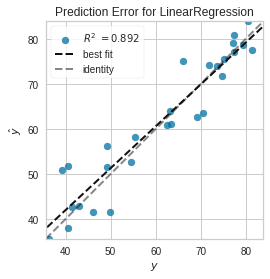

In [48]:
model = LinearRegression()
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)